In [1]:
# Workshop 1 : เขียนโปรแกรมไม่ใช้ Machine Learing
#y = slope * x + b สมการเส้นตรง
# y = mx + b
# y= output x = input slope = ความชันของเส้น coeff b = จุดตัดแกน y หรือ output เริ่มต้นโดยที่ input ยังไม่มี

m = (3.45-1)/(6-1) # slope as m
# b = y-(m*x)
b = 3.45 - (m*6) # เลือกจุด x = 6 , y = 3.45
# b # ได้ 0.509
# เขียนเป็นโปรแกรม และคำนวณคาดการณ์กำไร เมื่อลงทุนโฆษณา 2.5 ล้าน จะได้

x_in = 2.5
m
b
y2 = m*x_in + b #0twfh output=1.735
y2
x_input = [2.0, 2.5 , 3 , 5.0] # input มีหลายค่า
for k in x_input:
    y2 = m*k + b # ค่า m,b จากที่คำนวณด้านบน
    print('x={:3.1f} y={:4.2f}'.format(k,y2))

x=2.0 y=1.49
x=2.5 y=1.73
x=3.0 y=1.98
x=5.0 y=2.96


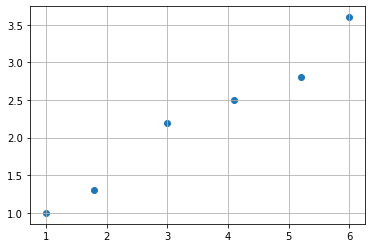

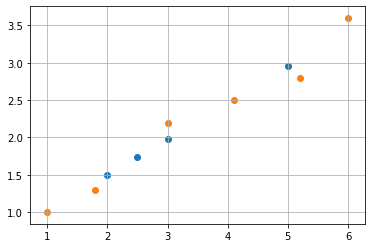

x=2.0 y=1.49246
x=2.5 y=1.73671
x=3.0 y=1.98095
x=5.0 y=2.95792


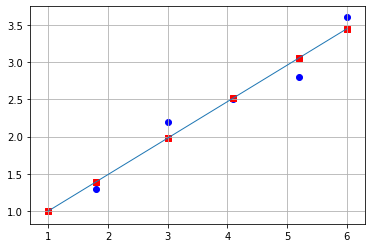

slope= [[0.48848496]] Y-intercept= [0.51549457]


In [6]:
# Workshop2 : เขียนโปรแกรมโยดใช้ machine learning
import matplotlib.pyplot as plt # plot graph
import numpy as np # numpy

x_data = [1.0,1.8,3.0,4.1,5.2,6.0] #ข้อมูลแกน x
y_data = [1,1.3,2.2,2.5,2.8,3.6] #ข้อมูลแกน y
x = np.array(x_data) # เปลี่ยน list ให้เป็น array โดย numpy
y = np.array(y_data) 
x
y
plt.scatter(x,y) # สังเกตกราฟจะมีแนวโน้มเป็นเส้นตรง
plt.grid()
plt.show()

from sklearn.linear_model import LinearRegression # สำหรับสมการเส้นตรง
# 1 เปลี่ยนรูปแบบเมทริกซ์ .reshape(-1,1)
x = x.reshape(-1,1)
x
y = y.reshape(-1,1)
y
model = LinearRegression() # เริ่มาร้าง Model (instantate)
# 2 train model
model.fit(x,y) # ป้อนข้อมูล x y ให้คอมพิวเตอร์ สร้าง model ให้ (Train)

# 3 pedict
model.predict([[2.5]]) # คำนวณหาผลลัพธ์
#predict พร้อมกันหลายๆค่า
x_input = [[2.0],
          [2.5],
          [3],
          [5.0]]      # ไม่จำเป็นต้องเรียงตรงแนว หรือจะเขียนเป็นบรรทัดเดียวก็ได้
y_predict = model.predict(x_input) # ทำนาย (predict)
y_predict
plt.scatter(x_input,y_predict)
plt.scatter(x,y)
plt.legend
plt.grid()
plt.show()

y_predict[1][0] # ได้ 1.736
y_predict[0][0] # ได้ 1.492

#แบบนี้ก็ได้
x_input = [2.0, 2.5, 3, 5.0]
x_input = np.array(x_input).reshape(-1,1) # .reshape ก่อน
y_predict = model.predict(x_input)
y_predict

# วนรอบอ่านค่า
y2_predict = y_predict.reshape(1,-1)
x_input_list = x_input

for i, item in enumerate(x_input_list):
    print ('x={} y={:.5f}'.format(item[0], y2_predict[0][i]))
    
# ดูเส้นจากสมการ model 
prd = model.predict(x) # หาค่า y (ทำนาย y)ทุกจุดที่ x เป็น input

plt.grid() # แสดงเส้น grid
plt.scatter(x,y,color='b') # พล็อตจุด Data ของจริง เป็นสีน้ำเงิน (b=blue)
plt.plot(x,prd,linewidth='1') # พล็อต เส้นตรง ที่เครื่องสร้าง model ให้

# พล็อตจุดที่ทำนายได้ให้ (s= จุดสี่เหลี่ยม sqaure, (r=red))
plt.scatter(x,prd,color='r',marker='s')
plt.show()

#จุดกลม(สีน้ำเงิน) คือจุดที่เป็นข้อมูล Data ค่า x y จริง (ได้มาจากการเก็บข้อมูลจริงๆชององค์กรหรือหน่วยงาน ซึ่งก็คือ Data ที่เราใช้สอนหรือ Train ให้คอมพิวเตอร์)
#เส้นตรงคือเส้นที่เกิดจาก model โดยเส้นนี้ที่เครื่องคำนวณแล้วลากผ่านจุดต่างๆของข้อมูลลจริงให้มีค่าผิดพลาดน้อยที่สุด (เครื่องพยายามเลือกให้ผ่านทุกจุด)
#จุดสี่เหลี่ยม(แดง)คือจุดที่ได้จากการทำนาย(ได้จากการคำนวณ predict)โดยป้อนค่า x เป็น input เข้าไปทำนาย
# ตรวจหา slope(m) และ intecept(b)ของสมการเส้นตรง
print("slope=",model.coef_,"Y-intercept=",model.intercept_)


In [7]:
#Workshop 3 : การบันทึกและเรียกใช้งาน model
from sklearn.externals import joblib
#บันทึก model เก็บเป็นไฟล์ ชื่อ my_model.pkl
#model คือตัวแปรเก็บค่า model ที่ได้จาก .fit() ซึ่งได้จากขั้นตอน train
joblib.dump(model,'my_model.pkl')

C:\Users\Chaiwat\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['my_model.pkl']

In [10]:
#Workshop 4 : การนำ model มาใช้งานในโปรแกรม
from sklearn.externals import joblib
import numpy as np
model = joblib.load('my_model.pkl') #โหลด model จากไฟล์ .pkl มาใช้งาน
#สมมติว่าinput ที่จะใช้ test มีค่าดังนี้
x_input = [2.0,2.5,3,5.0,5.5]
x_input = np.array(x_input).reshape(-1,1)

y_predict = model.predict(x_input) # ทำการรันทำนายผล
y_predict

array([[1.49246448],
       [1.73670696],
       [1.98094944],
       [2.95791935],
       [3.20216183]])

In [11]:
# สรุปภาพรวการสร้าง model 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.externals import joblib

x_data = [1.0, 1.8, 3.0, 4.1, 5.2, 6.0]
y_data = [1, 1.3, 2.2, 2.5, 2.8, 3.6]

x = np.array(x_data)
y = np.array(y_data)
x = x.reshape(-1,1)
y = y.reshape(-1,1)
model = LinearRegression()
model.fit(x,y)

joblib.dump(model,'my_model.pkl')
model.coef_,model.intercept_ # ทดสอบค่าในสมการเส้นตรงจากmodel

(array([[0.48848496]]), array([0.51549457]))